In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Generate synthetic data
X = np.linspace(0, 10, 20)
y = 3 * X + 4 + np.random.randn(20) * 2   # true slope=3, intercept=4 + noise


In [3]:
def cost_function(params, X, y):
    w, b = params
    y_pred = w * X + b
    cost = np.mean((y - y_pred) ** 2)
    return cost


In [4]:
def numerical_gradient(cost_func, params, X, y, h=1e-5):
    grads = np.zeros_like(params)
    for i in range(len(params)):
        temp = params[i]
        
        params[i] = temp + h
        cost_plus = cost_func(params, X, y)
        
        params[i] = temp - h
        cost_minus = cost_func(params, X, y)
        
        params[i] = temp  # restore value
        
        grads[i] = (cost_plus - cost_minus) / (2 * h)
    return grads


In [5]:
# Initialize parameters
params = np.array([0.0, 0.0])  # [w, b]
learning_rate = 0.01
epochs = 1000

# Training loop
for epoch in range(epochs):
    grads = numerical_gradient(cost_function, params, X, y)
    params -= learning_rate * grads  # update
    
    if epoch % 100 == 0:
        cost = cost_function(params, X, y)
        print(f"Epoch {epoch}: Cost={cost:.4f}, w={params[0]:.4f}, b={params[1]:.4f}")


Epoch 0: Cost=51.2700, w=2.5171, b=0.3937
Epoch 100: Cost=6.0284, w=3.3464, b=2.2941
Epoch 200: Cost=4.9309, w=3.1953, b=3.3201
Epoch 300: Cost=4.5496, w=3.1062, b=3.9249
Epoch 400: Cost=4.4170, w=3.0537, b=4.2814
Epoch 500: Cost=4.3710, w=3.0228, b=4.4915
Epoch 600: Cost=4.3550, w=3.0045, b=4.6154
Epoch 700: Cost=4.3494, w=2.9938, b=4.6885
Epoch 800: Cost=4.3475, w=2.9874, b=4.7315
Epoch 900: Cost=4.3468, w=2.9837, b=4.7569



Final Model: y = 2.981x + 4.772


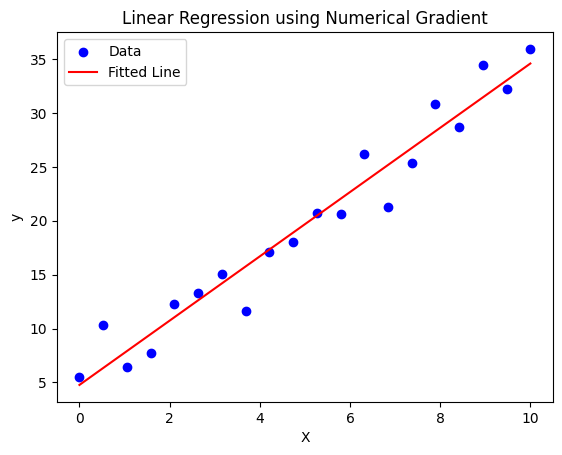

In [6]:
# Final parameters
w, b = params
print(f"\nFinal Model: y = {w:.3f}x + {b:.3f}")

# Plot
plt.scatter(X, y, label="Data", color="blue")
plt.plot(X, w * X + b, color="red", label="Fitted Line")
plt.title("Linear Regression using Numerical Gradient")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
